In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
breast_data = pd.read_csv("data.csv")

In [3]:
# Através do dytype é possível saber quais os tipos de dado está sendo aplicado dentro de cada coluna do dataframe
breast_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
breast_data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
"""
● Será removido as colunas "Unamed: 32" e "id": A primeira por ter valores Nulls e a segunda por ser informação de ID,
que pode incomodar ao se elaborar o modelo
"""
breast_data.drop(['Unnamed: 32','id'], axis=1, inplace=True)

In [6]:
breast_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
# M = Maligno e B = Benigno
# Substitui-se os valores os valores de B e M respectivamente por 0 e 1
breast_data["diagnosis"].replace({"B": "0", "M": "1"}, inplace=True)
breast_data["diagnosis"].value_counts() 

0    357
1    212
Name: diagnosis, dtype: int64

In [8]:
"""
● Cria-se a Matriz de Correlação
● Seleciona-se o triângulo da parte superior da matriz de correlação 
● Encontre valores no trângulo superior que contenham correlação acima de 0.95
● Remova os valores que foram encontrados que tenham o valor acima de 0.95
"""
corr_matrix = breast_data.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
breast_data.drop(to_drop, axis=1, inplace=True)

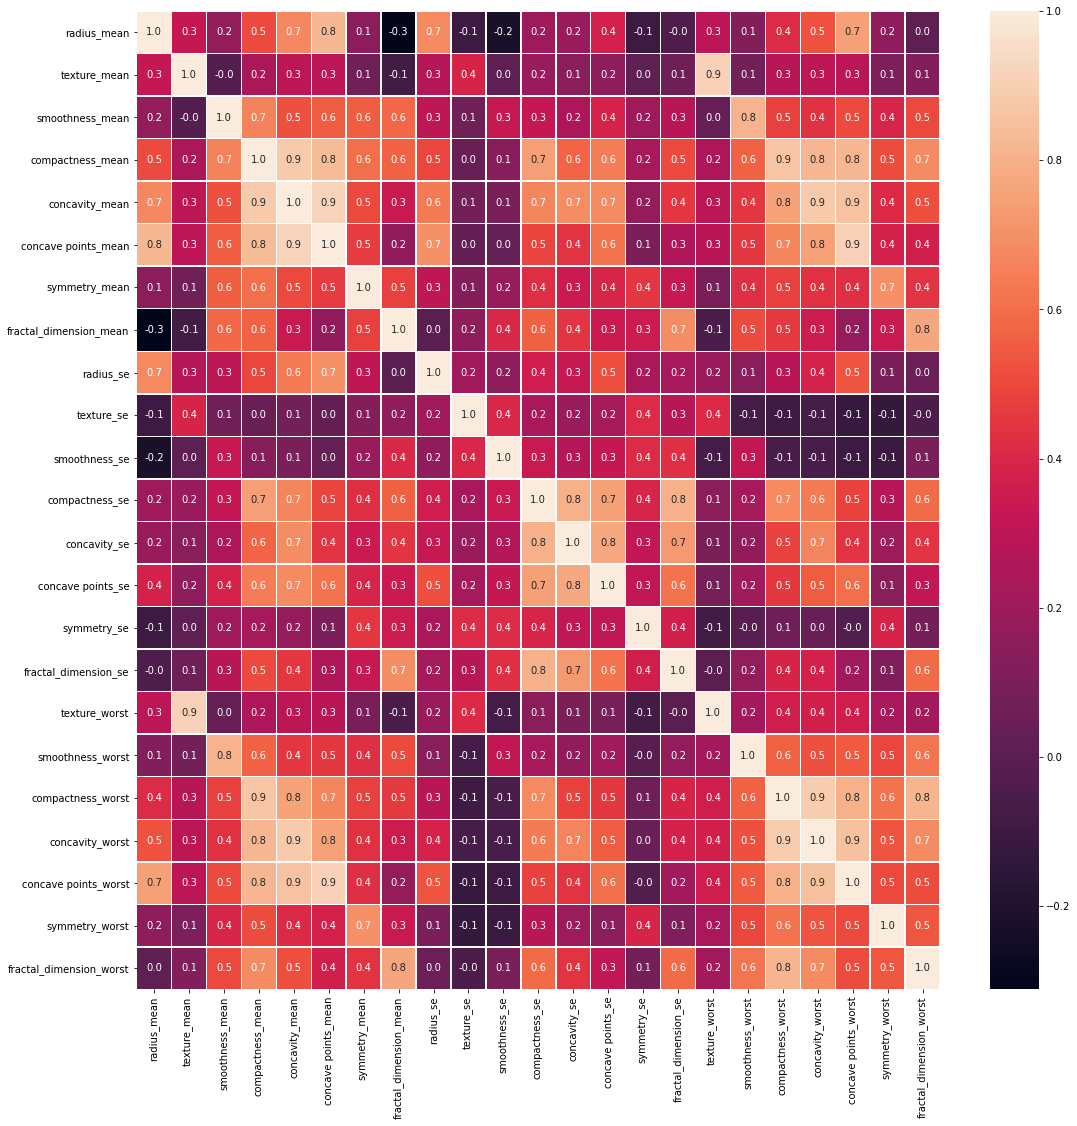

In [9]:
"""

Feito a remoção dos valores que tinham um valor de correlação acima de 0.95, então será trabalhado com os valores que
estão abaixo disso, a fim de encontrar um modelo razoável por meio das variáveis que sobraram

Abaixo é mostrado a correlação das variáveis que permaneceram e será com elas, que o trabalho será feito a partir daqui.

● No caso abaixo se não for utilizado o parâmetro fmt= '.1f' para se ter a quantidade desejada após o separador decimal,
neste caso o 1, significa que apenas trarei apenas um número logo após o separador
● Parâmetro annot é para que apareçam os valores dentro de cada quadradinho, 
assim não só dependendo da cor e sim saber o que de fato se correlaciona
"""
plt.subplots(figsize=(18, 18))
sns.heatmap(breast_data.corr(), annot=True, linewidths=.5, fmt= '.1f')

## Treinamento dos Dados

In [10]:
"""
● Será utilizado o método Iloc que é utilizado para selecionar todas as colunas exceto diganosis que será dedicada à
variável y
"""
X = breast_data.iloc[:, breast_data.columns != 'diagnosis']
y = breast_data['diagnosis']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20) 

In [12]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(455, 23) (114, 23) (455,) (114,)


In [13]:
model = MultinomialNB()
reg_model = LogisticRegression(solver='lbfgs', max_iter=3000) 

In [14]:
reg_model.fit(X_train, y_train)

LogisticRegression(max_iter=3000)

In [15]:
reg_model.score(X_test,y_test)

0.9298245614035088

In [16]:
model_predict = reg_model.predict(X_test) # Prediçao dos valores de teste
print(classification_report(y_test, model_predict)) # Relatorio de metricas

              precision    recall  f1-score   support

           0       0.93      0.96      0.94        71
           1       0.93      0.88      0.90        43

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



In [17]:
cm = confusion_matrix(y_test, model_predict)
pd.DataFrame(cm, index=['B', 'M'], columns=['B', 'M'])

,B,M
B,68,3
M,5,38
